In [1]:
# working with ELG_full_all_vtest downloaded on March 12
%matplotlib inline
import matplotlib.pyplot as plt
import os 
import sys
import fitsio as ft
import numpy as np
import healpy as hp

In [ ]:
sys.path.append('/global/homes/m/mehdi/github/DESILSS')
from syslss import hpixsum

In [2]:
# Anand sys map in nside of 256
nside=256

In [ ]:
# # read data
# data = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.dat.fits', 
#                lower=True, columns=['ra', 'dec'])
# # print(data.dtype.names)
# elgmap = hpixsum(nside, data['ra'], data['dec'])

# # backup elgmap
# hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg256.fits', elgmap, fits_IDL=False)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


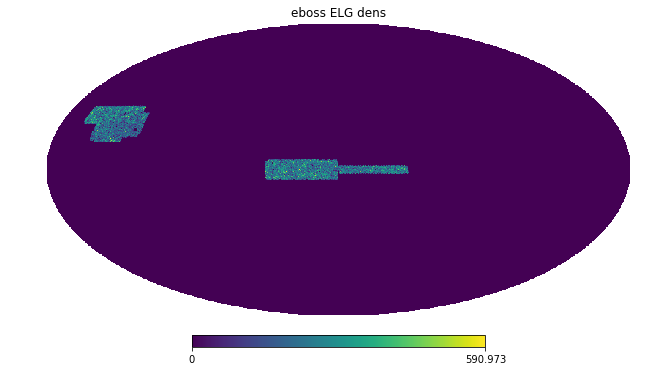

In [27]:
# read elg hp map
elghp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg256.fits')
hp.mollview(elghp/hp.nside2pixarea(nside, degrees=True), title='eboss ELG dens')

In [ ]:
# # read random
# random = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.ran.fits', 
#                lower=True, columns=['ra', 'dec', 'probanymask'])
# ranmap = hpixsum(nside, random['ra'], random['dec'], value=1-random['probanymask'])
# hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran256.fits', ranmap, fits_IDL=False)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


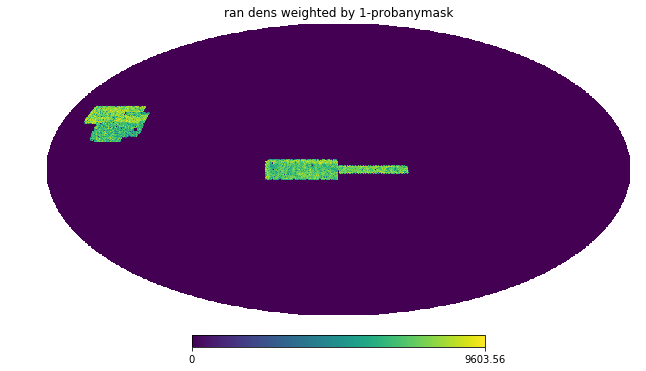

In [28]:
ranhp = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran256.fits')
hp.mollview(ranhp/hp.nside2pixarea(nside, degrees=True), title='ran dens weighted by 1-probanymask')

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-pac

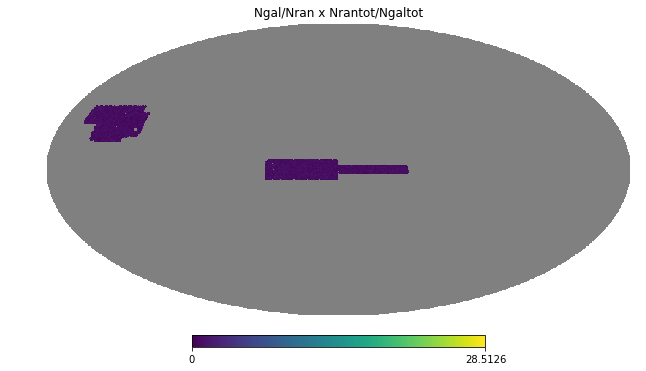

In [47]:
label = (elghp / ranhp) * (ranhp.sum()/elghp.sum())
label[np.isinf(label)] = np.nan
mask = ~np.isnan(label)
hp.mollview(label, title='Ngal/Nran x Nrantot/Ngaltot')

1.00670333639


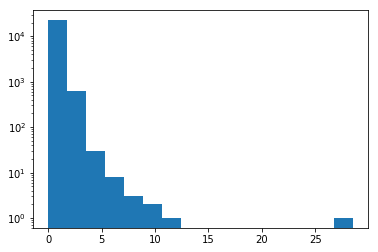

In [50]:
_=plt.hist(label[mask], bins=16)
plt.yscale('log')
print(np.mean(label[mask]))

In [51]:
# read sysmaps WO NDET
syscols = ['hpstardens', 'hpstardensfit', 'hpebv', 
           'hppsfsize_g', 'hppsfsize_r', 'hppsfsize_z', 
           'hppsfdepth_g', 'hppsfdepth_r', 'hppsfdepth_z', 
           'hpgaldepth_g', 'hpgaldepth_r', 'hpgaldepth_z']
sysmaps = ft.read('$SCRATCH/eboss/ELG_systhp.nside256.fits', lower=True, columns=['hpind']+syscols)
sysmaps.dtype.names, sysmaps.size

(('hpind',
  'hpstardens',
  'hpstardensfit',
  'hpebv',
  'hppsfsize_g',
  'hppsfsize_r',
  'hppsfsize_z',
  'hppsfdepth_g',
  'hppsfdepth_r',
  'hppsfdepth_z',
  'hpgaldepth_g',
  'hpgaldepth_r',
  'hpgaldepth_z'),
 786432)

In [52]:
# check if the ordering is right
np.array_equal(sysmaps['hpind'], np.arange(12*256**2))

True

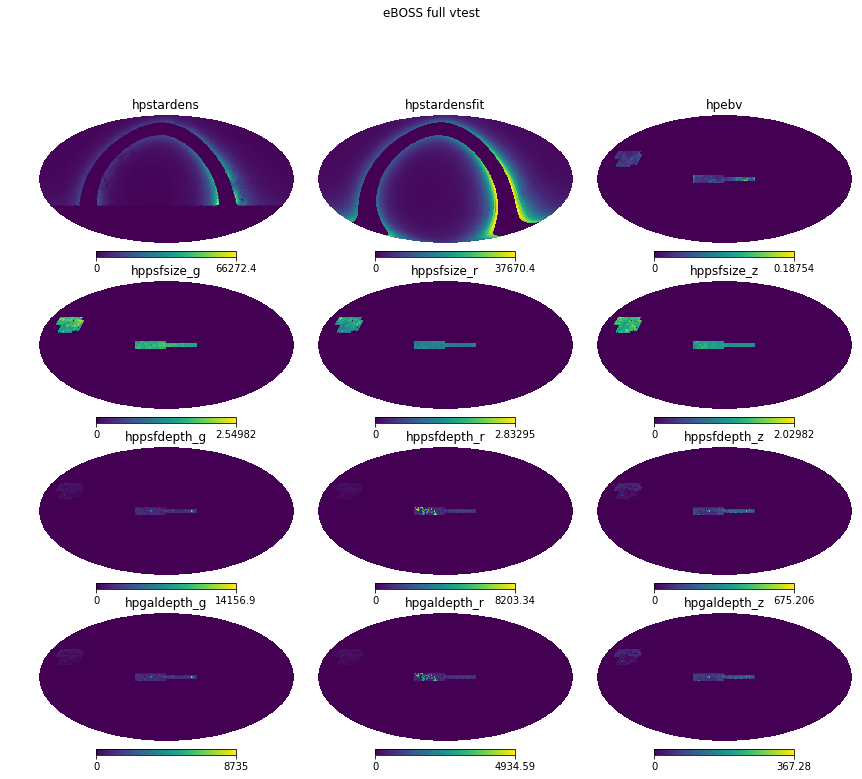

In [53]:
f,a = plt.subplots(ncols=3, nrows=5, figsize=(15, 15))
plt.suptitle("eBOSS full vtest")
a = a.flatten()
f.delaxes(a[-1])
f.delaxes(a[-2])
f.delaxes(a[-3])
plt.subplots_adjust(hspace=.1, wspace=.0)
for i,sys_n in enumerate(syscols):
    plt.axes(a[i])
    hp.mollview(sysmaps[sys_n], title=sys_n, hold=True)

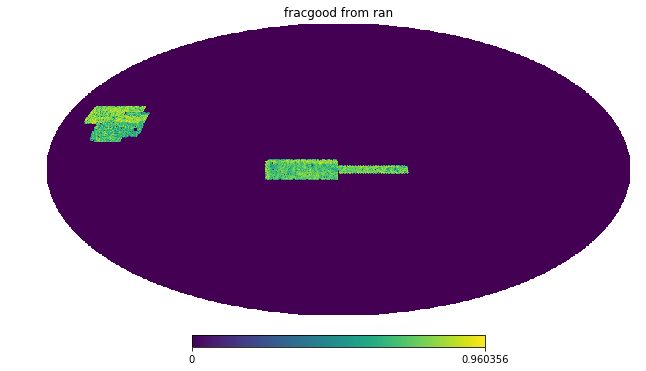

In [55]:
fracgood = ranhp / (10000*hp.nside2pixarea(nside, degrees=True))  # 10000 randoms per deg2
hp.mollview(fracgood, title='fracgood from ran')

(array([  717.,    89.,   145.,   289.,   667.,  2345.,  6534.,  8488.,
         3671.,   210.]),
 array([ 0.01004019,  0.10948799,  0.20893579,  0.30838359,  0.40783139,
         0.50727919,  0.606727  ,  0.7061748 ,  0.8056226 ,  0.9050704 ,
         1.0045182 ]),
 <a list of 10 Patch objects>)

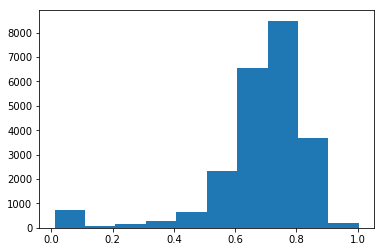

In [57]:
plt.hist(fracgood[fracgood>0.01])

In [58]:
arg = fracgood > 0.01
syslists = []
for i,sys_n in enumerate(syscols):
    syslists.append(sysmaps[sys_n][arg])
allsysmaps = np.column_stack(syslists)

In [59]:
# select number of galaxies in each pixel as label
label = label[arg]
# select healpix indices as hpix
hpix = np.argwhere(arg).flatten()
# initialize the structured numpy array
outdata = np.zeros(allsysmaps.shape[0], 
                   dtype=[('hpix','i8'), ('features',('f8', allsysmaps.shape[1])), 
                          ('label','f8'), ('fracgood','f8')]
                  )
outdata['hpix']     = hpix
outdata['features'] = allsysmaps
outdata['label']    = label
outdata['fracgood'] = fracgood[arg]

In [60]:
ft.write('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/ngal-feat-256-wofrac-wondet.fits',
         outdata)

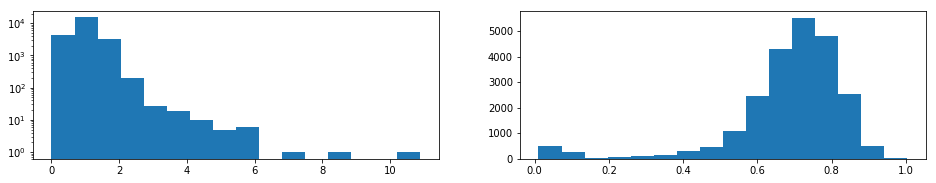

In [63]:
plt.figure(figsize=(16,6))
plt.subplot(221)
plt.hist(outdata['label'], bins=16)
plt.yscale('log')
plt.subplot(222)
_=plt.hist(outdata['fracgood'], bins=16)


In [92]:
allsysmaps.shape

(23155, 12)

In [97]:
from scipy.stats import pearsonr

hpstardens corr. coef. = 0.00
hpstardensfit corr. coef. = -0.00
hpebv corr. coef. = 0.00
hppsfsize_g corr. coef. = -0.06
hppsfsize_r corr. coef. = -0.08
hppsfsize_z corr. coef. = -0.05
hppsfdepth_g corr. coef. = 0.08
hppsfdepth_r corr. coef. = 0.04
hppsfdepth_z corr. coef. = 0.05
hpgaldepth_g corr. coef. = 0.08
hpgaldepth_r corr. coef. = 0.04
hpgaldepth_z corr. coef. = 0.06


/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


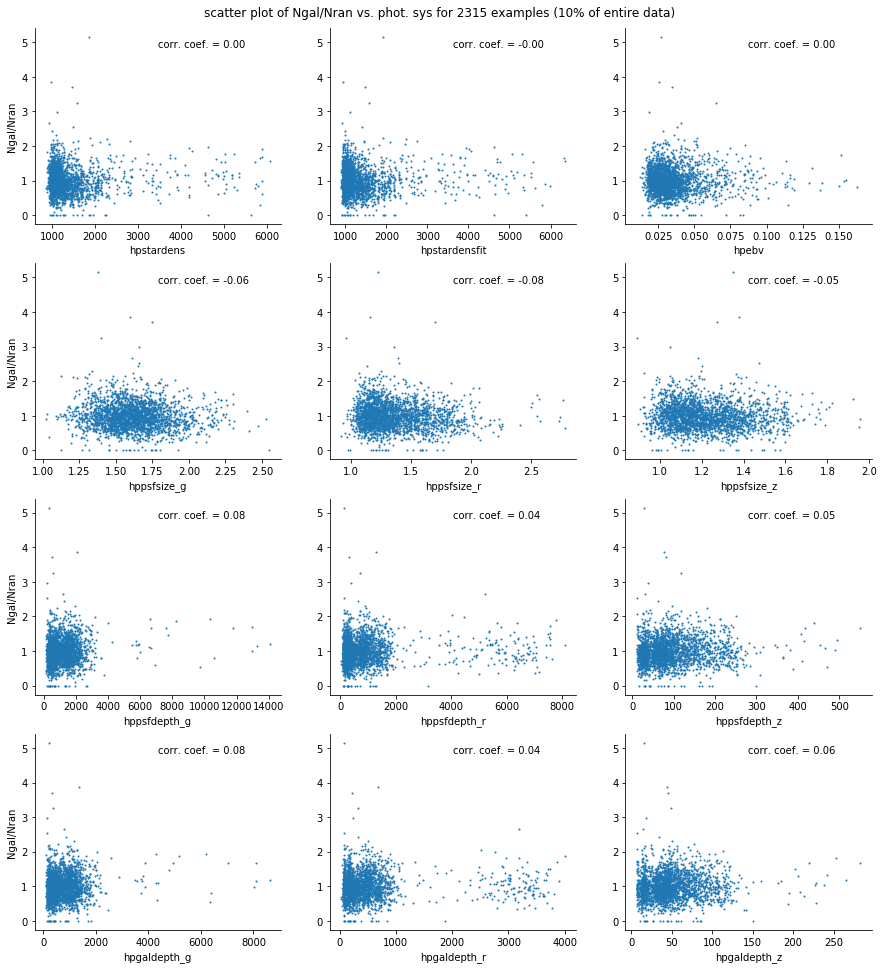

In [102]:
f,a = plt.subplots(ncols=3, nrows=4, figsize=(15, 15))
plt.suptitle("eBOSS full vtest")
a = a.flatten()

plt.rc('axes.spines', right=False, top=False)
plt.rc('font', family='Times New Roman')
# plt.rcParams['axes.facecolor'] = 'white'
ind = np.random.choice(np.arange(0, outdata.size), size=outdata.size//10, replace=False)
plt.subplots_adjust(top=0.96)
plt.suptitle("scatter plot of Ngal/Nran vs. phot. sys for {} examples (10% of entire data)".format(ind.size))
for s in range(outdata['features'].shape[1]):
    l = outdata['label']
    f = outdata['features'][:,s]
    cf = pearsonr(f, l)[0]
    print(syscols[s], "corr. coef. = %.2f"%cf)
    a[s].scatter(f[ind], l[ind], 1.0)
    a[s].set_xlabel(syscols[s])
    a[s].text(0.5, 0.9, "corr. coef. = {:.2f}".format(cf), transform=a[s].transAxes)
    if s in [0, 3, 6, 9, 12]:a[s].set_ylabel("Ngal/Nran")

In [103]:
from sklearn.model_selection import KFold

In [104]:
def split2kfolds(data, k=4, shuffle=True):
    kfold = KFold(k, shuffle=shuffle)
    index = np.arange(data.size)
    kfold_data = {'test':{}, 'train':{}}
    for i, (trainID, testID) in enumerate(kfold.split(index)):
        foldname = 'fold'+str(i)
        kfold_data['test'][foldname] = data[testID]
        kfold_data['train'][foldname] = data[trainID]
    return kfold_data

In [105]:
data4fold = split2kfolds(outdata, k=4)

In [106]:
# backup 
np.save('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/test_train_eboss_4fold-wo-ndet-frac', data4fold)

In [107]:
data_eboss = np.load('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/test_train_eboss_4fold-wo-ndet-frac.npy').item()

In [108]:
def scatterhpx(hpix, **kwargs):
    theta, phi = hp.pix2ang(256, hpix)
    ra  = np.degrees(phi)
    dec = np.degrees(np.pi/2 - theta)
    if hpix.size > 1000:
        n  = np.random.choice(np.arange(hpix.size), size=5000, replace=False)
        plt.scatter(ra[n], dec[n], **kwargs)
    else:
        plt.scatter(ra, dec, **kwargs)
    plt.xlabel('RA')
    plt.ylabel('DEC')

In [109]:
fold = 'fold0'
test = data_eboss['test'][fold]
train = data_eboss['train'][fold]

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


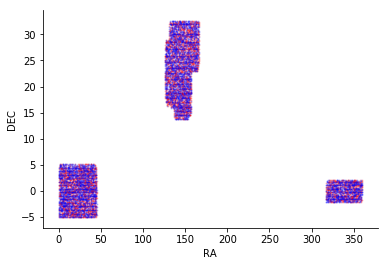

In [110]:
scatterhpx(test['hpix'], color='r', alpha=0.2, s=1.)
scatterhpx(train['hpix'], color='b', alpha=0.2, s=1.)

In [111]:
np.intersect1d(train['hpix'], test['hpix'])

array([], dtype=int64)

In [113]:
data_eboss['train']['fold0'][:2]

array([ (181112, [  1.55011304e+03,   1.54433704e+03,   2.93296799e-02,   1.95099831e+00,   2.82850289e+00,   1.47279096e+00,   3.29659851e+02,   4.35207214e+01,   4.62778244e+01,   2.50792984e+02,   3.71258812e+01,   2.99432163e+01],  0.,  0.01715728),
       (181113, [  1.55368750e+03,   1.49266626e+03,   2.91547775e-02,   2.33139229e+00,   1.17793477e+00,   1.52039921e+00,   1.95199448e+02,   2.13622147e+02,   1.64144936e+01,   1.58730301e+02,   1.16007019e+02,   1.07978048e+01],  0.,  0.02430615)],
      dtype=[('hpix', '<i8'), ('features', '<f8', (12,)), ('label', '<f8'), ('fracgood', '<f8')])

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
files = glob('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet-frac/fold*/*')
files.sort()
files

['/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet-frac/fold0/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet-frac/fold1/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet-frac/fold2/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz',
 '/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet-frac/fold3/reg-nepoch500-nchain10-batchsize2000units1010-Lrate0.01.npz']

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


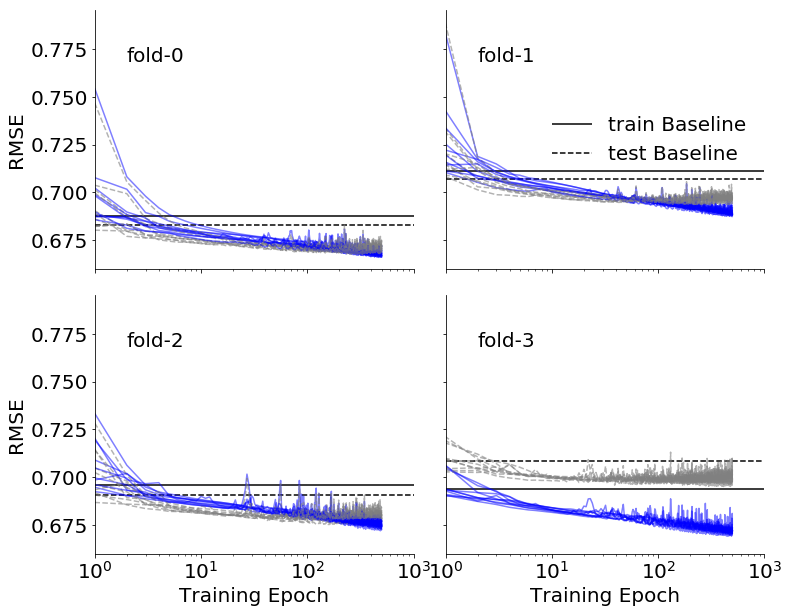

In [4]:
plt.rc('font', size=20, family='Times New Roman')
plt.rc('axes.spines', right=False, top=False)
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10),
                     sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax = ax.flatten()
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    for i,rmse in enumerate(out['epoch_RMSEs']):
        if i == 0:
            ax[j].hlines(xmin=1,xmax=3000,y=out['options']['baselineRMSE'][0],
                         linestyles='-', label='train Baseline', alpha=1., color='k')
            ax[j].hlines(xmin=1,xmax=3000,y=out['options']['baselineRMSE'][1],
                         linestyles='--', label='test Baseline', alpha=1., color='k')

        ax[j].plot(rmse[-1][:,0], rmse[-1][:,1],ls='-',c='blue', alpha=0.5)
        ax[j].plot(rmse[-1][:,0], rmse[-1][:,2],ls='--',c='grey', alpha=0.6)
    ax[j].set_xscale('log')
    ax[j].text(0.1, 0.8, "fold-"+str(j), transform=ax[j].transAxes)
    if j==1:ax[j].legend(frameon=False, loc='center right')
#     ax[j].set_ylim(0.8, 1.1)
#     ax[j].text(100, 1.02*rmse[2], "Baseline RMSE", color="k")
    if j in [0, 2]:ax[j].set_ylabel('RMSE')
    if j in [2, 3]:ax[j].set_xlabel('Training Epoch')
    ax[j].set_xlim(1, 1000)

In [5]:
"""
    Reading the Ngal and systematic
"""
p_true = []
x_true = []
y_true = []
y_pred = []
y_base = []
for j,file_i in enumerate(files):
    d = np.load(file_i)
    out = d['arr_0'].item()
    p_true.append(out['test'][0])
    x_true.append(out['test'][1])
    y_true.append(out['test'][2].squeeze())
    ybasei = np.ones(out['test'][2].shape[0])*np.mean(out['train'][2])
#     print(np.sqrt(np.mean((out['test'][2].squeeze() - ybasei)**2)), ybasei[0])
    y_base.append(ybasei)
    y_avg = []
    for i in range(len(out['chain_y'])):
        y_avg.append(out['chain_y'][i][1].squeeze().tolist())    
    meanY, stdY = out['options']['stats']['ystat']
    print(meanY, stdY)
    y_pred.append(stdY*np.mean(np.array(y_avg), axis=0) + meanY)

Ptrue = np.concatenate(p_true)
Xtrue = np.concatenate(x_true)
Ytrue = np.concatenate(y_true)
Ybase = np.concatenate(y_base)
Ypred = np.concatenate(y_pred)
print(Xtrue.shape, Ytrue.shape, Ypred.shape, Ybase.shape)

[ 1.00814602] [ 0.41886885]
[ 1.00502758] [ 0.40475143]
[ 1.00616805] [ 0.41384548]
[ 1.00235834] [ 0.41215426]
(23155, 12) (23155,) (23155,) (23155,)


In [6]:
Ypred.min(), Ypred.max()

(0.64915510138757226, 1.4744978746323314)

In [6]:
nnpred = np.zeros(Ypred.size, dtype=[('hpix','i8'), ('weight','f8')])
nnpred['hpix']   = Ptrue
nnpred['weight'] = Ypred 

In [7]:
nnpred[:2]

array([(181134,  0.97128234), (181141,  0.93301258)],
      dtype=[('hpix', '<i8'), ('weight', '<f8')])

Text(0.5,0,'weights')

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


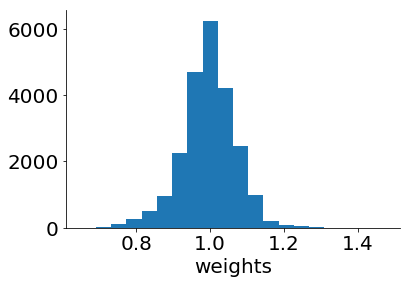

In [10]:
_=plt.hist(nnpred['weight'], bins=20)
plt.xlabel('weights')

In [11]:
ls /global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/

ELG.v5_10_7.latest.fits            hp-ran256.fits
ELG.v5_10_7.latest.rands.fits      hp-ran512.fits
data4fold/                         ngal-feat-256-wo-ndet.fits
eBOSS_ELG_full_ALL_vtest.dat.fits  ngal-feat-256-wofrac-wondet.fits
eBOSS_ELG_full_ALL_vtest.ran.fits  ngal-feat-256.fits
hp-deltaNN512.fits                 xi-256nn.npy
hp-elg256.fits                     xi-256uni.npy
hp-elg512.fits                     xi-512nn-chunks.npy
hp-nn256.fits                      xi-512nn.npy
hp-nn512.fits


In [12]:
import fitsio as ft

In [27]:
# saving the NN weights for later use
ft.write('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/nn-weights-nside256.fits', nnpred,
        header={'weight':'NN weights', 'hpix':'healpix indices for nside 256'})

In [28]:
d,h = ft.read('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/nn-weights-nside256.fits', header=True)

In [29]:
d, h

(array([(181134,  0.97128234), (181141,  0.93301258), (181142,  0.99960701),
        ..., (427638,  1.0738795 ), (427645,  0.87602658),
        (427646,  0.79900734)],
       dtype=[('hpix', '>i8'), ('weight', '>f8')]), 
 XTENSION= 'BINTABLE'           / binary table extension
 BITPIX  =                    8 / 8-bit bytes
 NAXIS   =                    2 / 2-dimensional binary table
 NAXIS1  =                   16 / width of table in bytes
 NAXIS2  =                23155 / number of rows in table
 PCOUNT  =                    0 / size of special data area
 GCOUNT  =                    1 / one data group (required keyword)
 TFIELDS =                    2 / number of fields in each row
 TTYPE1  = 'hpix    '           / label for field   1
 TFORM1  = 'K       '           / data format of field: 8-byte INTEGER
 TTYPE2  = 'weight  '           / label for field   2
 TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE
 WEIGHT  = 'NN weights'
 HPIX    = 'healpix indices for nsi

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


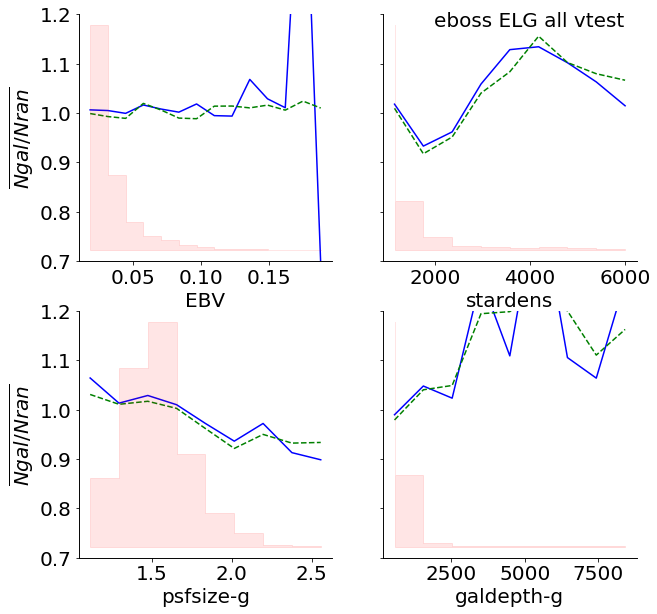

In [8]:
nside2pixarea =lambda nside: 4.*np.pi / (12*nside*nside) * 3282.80635
def get_nsys(sys, ngal, bins):
    npix,_ = np.histogram(sys, bins=bins)
    ngalp,_ = np.histogram(sys, bins=bins, weights=ngal)
    return 0.5*(bins[:-1]+bins[1:]), ngalp/npix, npix

def plot_ith(ax1, xlabel='EBV', index=0, nbins=20):
    xl=[]
    y1l =[]
    y2l = []
    bins = np.linspace(Xtrue[:,index].min(), Xtrue[:,index].max(), nbins)
    for x,y in [(Xtrue[:,index], Ytrue),(Xtrue[:,index], Ypred), (Xtrue[:,index], Ybase)]:
        x, y, a = get_nsys(x, y, bins)
        xl.append(x)
        y1l.append(y)
        y2l.append(a)
        
    ax2 = ax1.twinx()
    lt = ['-','--']
    c  = ['blue', 'green']
    ax2.fill_between(xl[0], y2l[0], color='red', alpha=0.1, step='pre')
    for i, label_i in enumerate(['true', 'prediction']):
        ax1.plot(xl[i], y1l[i], ls=lt[i], color=c[i], label=label_i)
        if index==1:ax1.text(0.7, 0.8-i*0.1, label_i, color=c[i], transform=ax1.transAxes)

    if index==1:
        ax2.text(0.15, 0.1, r'Total pix = {:d}'.format(np.sum(y2l[0])),
             transform=ax2.transAxes, fontsize=20, color='r')
    ax2.set_yticks([])
    ax1.set_xlabel(xlabel)
    ax1.set_ylim(0.7, 1.2)
#    ax2.set_ylim(0, 500)
    
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)

ax = ax.flatten()
ax[1].text(0.2, 0.95, 'eboss ELG all vtest', transform=ax[1].transAxes)
plot_ith(ax[0], index=2, xlabel='EBV', nbins=15)
plot_ith(ax[1], index=0, xlabel='stardens', nbins=10)
plot_ith(ax[2], index=3, xlabel='psfsize-g', nbins=10)
plot_ith(ax[3], index=9, xlabel='galdepth-g', nbins=10)
for i in [0, 2]:ax[i].set_ylabel(r'$\overline{Ngal/Nran}$')

In [6]:
import sys
sys.path.append('/global/homes/m/mehdi/github/DESILSS')
from syslss import ngalsys

In [8]:
import healpy as hp

In [9]:
npix = 12*256**2
mask = np.zeros(npix)
mask[Ptrue] = 1.0
ranmap2 = np.zeros(npix)
ranmap2[Ptrue] = Ypred
galmap  = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-elg256.fits')
ranmap1 = hp.read_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-ran256.fits')

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [10]:
class systematic(object):
    def __init__(self, sysname, mask):
        df = sysname #ft.read(sysname, lower=True)
        self.HPIX = np.argwhere(~np.logical_not(mask)).flatten()
        self.SIGNAL = df[~np.logical_not(mask)]

In [11]:
allchunks = dict()
# def bins(i, minx, maxx, nbin):
#     if i <
for i in range(Xtrue.shape[1]):
    #print(i)
    sysi  = np.zeros(npix)
    sysi[Ptrue]  = Xtrue[:,i]  # nstar
    sysi256 = systematic(sysi, mask)
    sysibin = np.logspace(np.log10(Xtrue[:,i].min()), np.log10(Xtrue[:,i].max()), 10)
    #print(sysibin.min(), sysibin.max())
    #
    eboss = ngalsys(galmap, 256,hpmap=True)
    eboss.prepare_inputs(sysi256, selection_function=ranmap1, fracdet_c=-1, mask=mask.astype(np.bool))
    eboss.digitize_ngalsys(sysibin)
    eboss.processjack(njack=10)
    #
    ebossai = ngalsys(galmap, 256,hpmap=True)
    ebossai.prepare_inputs(sysi256, selection_function=ranmap1*ranmap2, fracdet_c=-1, mask=mask.astype(np.bool))
    ebossai.digitize_ngalsys(sysibin)
    ebossai.processjack(njack=10)
    allchunks[i] = dict(uni = eboss.output, ai=ebossai.output)

In [12]:
np.save('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/data4fold/wo-ndet-frac/eboss_nnbar_all', allchunks)

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


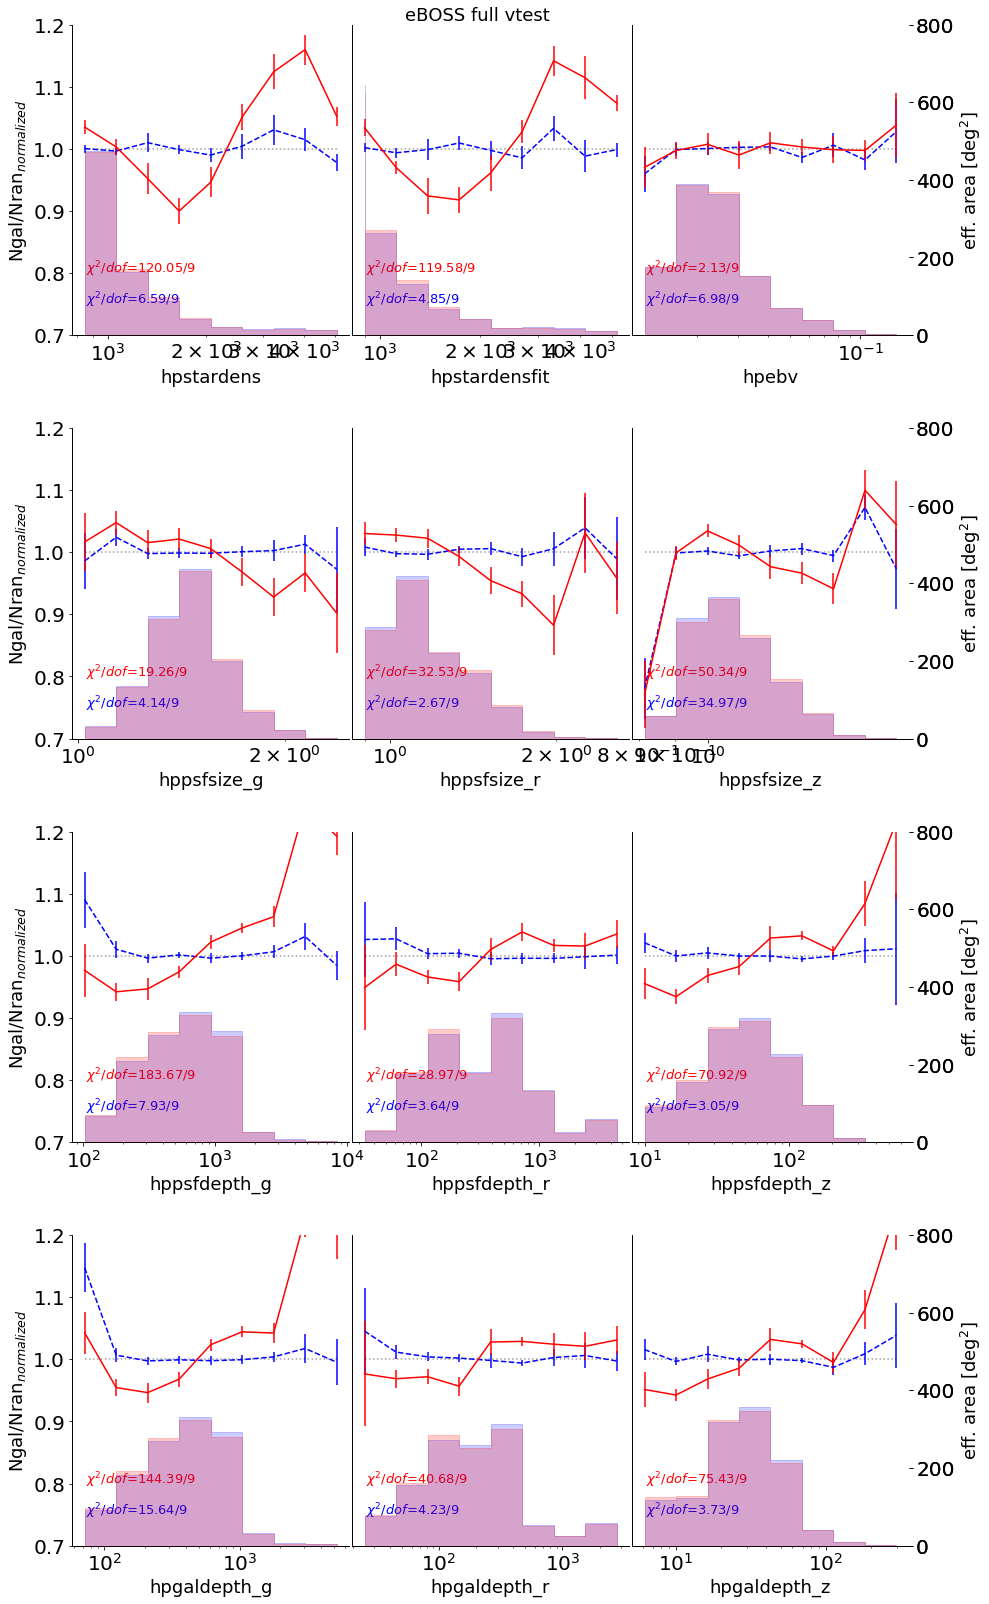

In [13]:
syscols = ['hpstardens', 'hpstardensfit', 'hpebv', 
           'hppsfsize_g', 'hppsfsize_r', 'hppsfsize_z', 
           'hppsfdepth_g', 'hppsfdepth_r', 'hppsfdepth_z', 
           'hpgaldepth_g', 'hpgaldepth_r', 'hpgaldepth_z']
labels = syscols
plt.rc('axes.spines', top=False, right=False)
f,a = plt.subplots(ncols=3, nrows=4, figsize=(15, 25))
plt.suptitle("eBOSS full vtest", fontsize=18)
a = a.flatten()
plt.subplots_adjust(wspace=0.01, hspace=0.3, top=0.97)

def helper(name):
    x = name['bin_edges'][:-1]
    y = name['delta']
    ye = name['delta_err']
    s = name['area']
    mask = (y != 0.0 ) & ~np.isnan(y) & (ye !=0.0) & (~np.isnan(ye))
    x = x[mask]
    y = y[mask]
    ye = ye[mask]
    s  = s[mask]
    return x, y, ye, s

chi2 = lambda y, ye: np.sum(((y-1.0)/ye)**2)

def add_plot(ax, n, t, i, text=True, **kwargs):
    a2 = ax.twinx()
    x,y,ye,s = helper(n)
    ax.errorbar(x, y, yerr=ye,**kwargs)
    kwargs.pop('linestyle')
    ax.text(0.05, 0.1+0.1*i, r'$\chi^{}/dof$={:.2f}/{}'.format(2, chi2(y, ye),y.size),
           transform=ax.transAxes, **kwargs, fontsize=13)
    a2.fill_between(x, s, step='pre', alpha=0.2, **kwargs)
    a2.set_ylim(0,800)
    ax.set_ylim(0.7, 1.2)
    ax.plot([x.min(), x.max()], [1, 1], 'k:', alpha=0.2)
    return a2


for j,i in enumerate(range(0,12)):
    #print(j,i)
    a2_0 = add_plot(a[j], allchunks[i]['ai'], labels[i], 0, color='b', linestyle='--')
    a2_1 = add_plot(a[j], allchunks[i]['uni'], labels[i],1, color='r', text=False, linestyle='-')
    if j in [0, 3, 6, 9, 12]:
        a[j].set_ylabel(r'Ngal/Nran$_{normalized}$', fontsize=18)
    else:
        a[j].set_yticks([])
    if j in [2, 5, 8, 11, 12]:
        a2_1.set_ylabel(r'eff. area [deg$^{2}$]', fontsize=18)
    else:
        a2_1.set_yticks([])
        a2_0.set_yticks([])
    a[j].set_xlabel(labels[i], fontsize=18)
    a[j].set_xscale('log')

Now we want to look at each different chunk

In [15]:
import fitsio as ft
RANDOM = ft.read('$SCRATCH/eboss/ebossv5_10_7/march12/eBOSS_ELG_full_ALL_vtest.ran.fits', 
               lower=True, columns=['ra', 'dec', 'probanymask', 'chunk'])
# ranmap = hpixsum(nside, random['ra'], random['dec'], value=1-random['probanymask'])

In [16]:
from syslss import hpixsum

In [18]:
maskname = ['1', '2', '3', '5']
ranmasks = []
for i in ['1', '2', '3', '5']:
    mask2i = RANDOM['chunk'] == b'eboss2'+bytes(i, 'utf8')
    ranmasks.append(hpixsum(256, RANDOM['ra'][mask2i], 
                       RANDOM['dec'][mask2i], 
                       value=1-RANDOM['probanymask'][mask2i]).astype(np.bool))

In [19]:
allmasks = dict()
for j, mask_i in enumerate(ranmasks):
    allchunkS = dict()
    # def bins(i, minx, maxx, nbin):
    #     if i <
    for i in range(Xtrue.shape[1]):
#        print(i)
        sysi  = np.zeros(npix)
        sysi[Ptrue]  = Xtrue[:,i]  # nstar
        minx, maxx = sysi[(sysi!=0.0)&mask_i].min(), sysi[mask_i].max()        
        sysi256 = systematic(sysi, mask_i)
        sysibin = np.logspace(np.log10(minx), 
                              np.log10(maxx), 10)
        #
        eboss = ngalsys(galmap, 256,hpmap=True)
        eboss.prepare_inputs(sysi256, selection_function=ranmap1, 
                             fracdet_c=-0.2, mask=mask_i)
        eboss.digitize_ngalsys(sysibin)
        eboss.processjack(njack=10)
        #
        ebossai = ngalsys(galmap, 256,hpmap=True)
        ebossai.prepare_inputs(sysi256, selection_function=ranmap1*ranmap2, 
                               fracdet_c=-0.2, mask=mask_i)
        ebossai.digitize_ngalsys(sysibin)
        ebossai.processjack(njack=10)
        allchunkS[i] = dict(uni = eboss.output, ai=ebossai.output)
    allmasks[maskname[j]] = allchunkS

/global/homes/m/mehdi/github/DESILSS/syslss.py:331: RuntimeWarning: invalid value encountered in double_scalars
  std = np.sqrt(std)/(len(self.sysl[i])-1.)


In [20]:
allmasks.keys()

dict_keys(['1', '2', '3', '5'])

In [21]:
np.save('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/'\
        +'march12/data4fold/wo-ndet-frac/eboss_nnbar_chunks', allmasks)

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


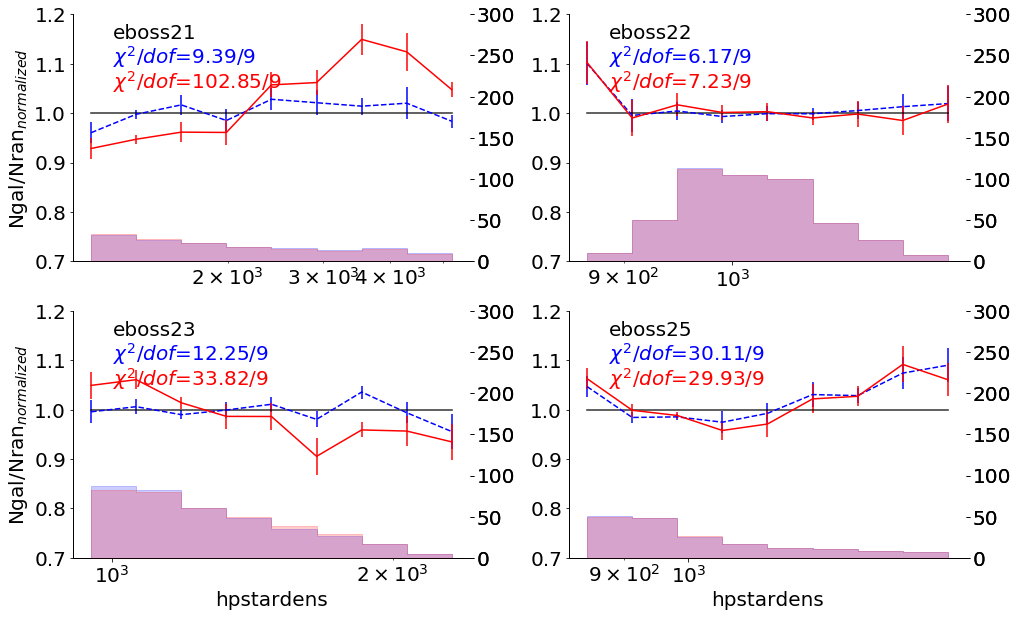

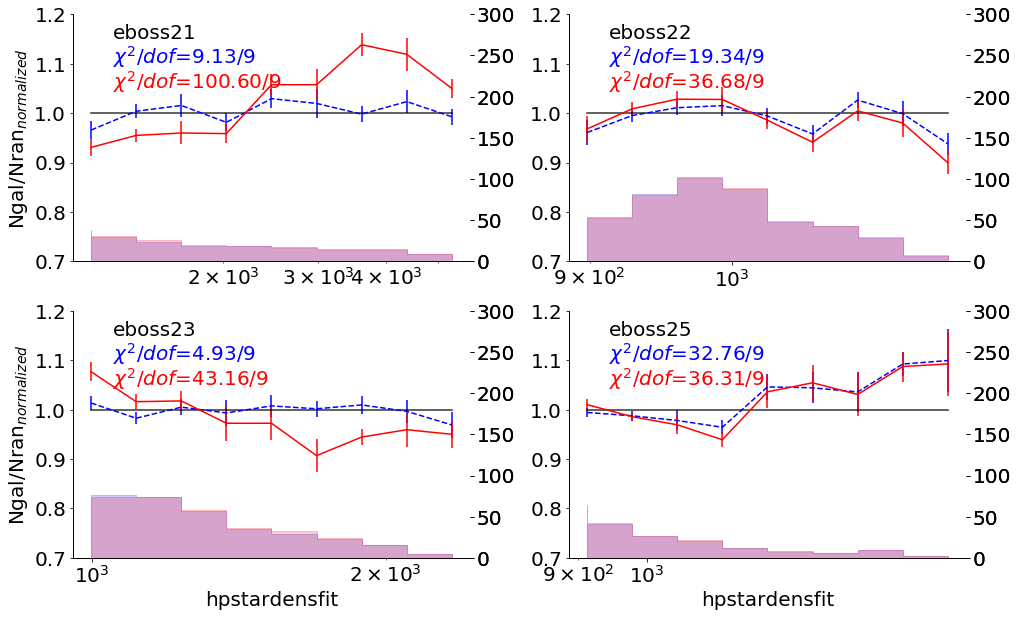

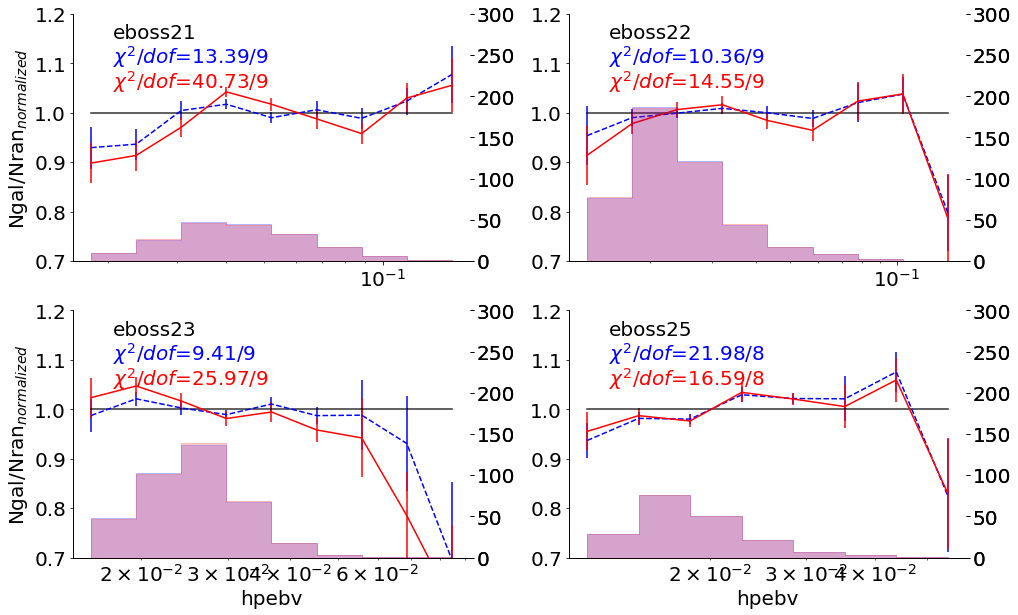

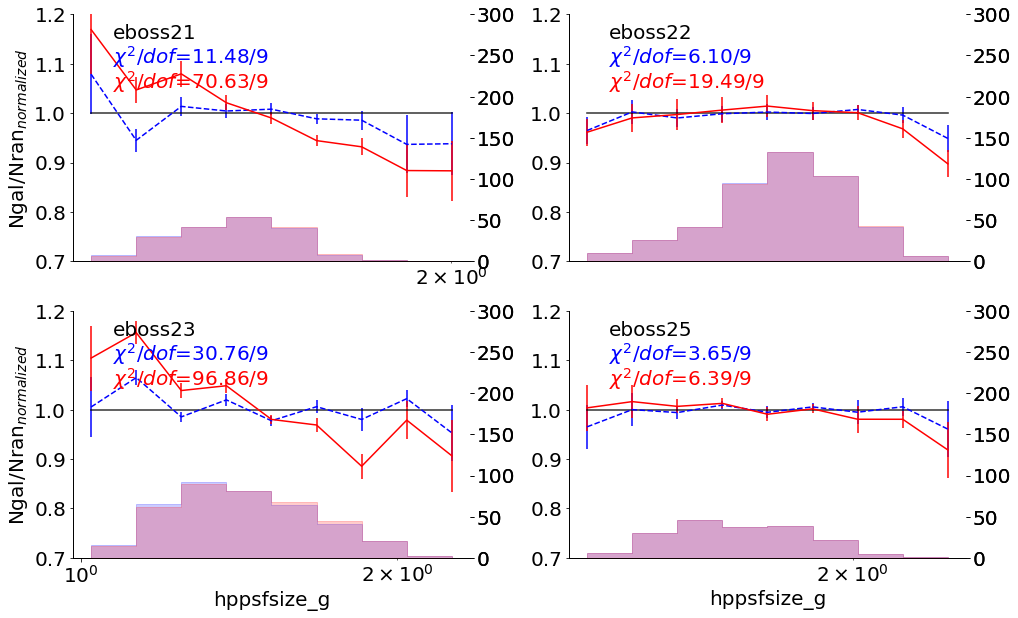

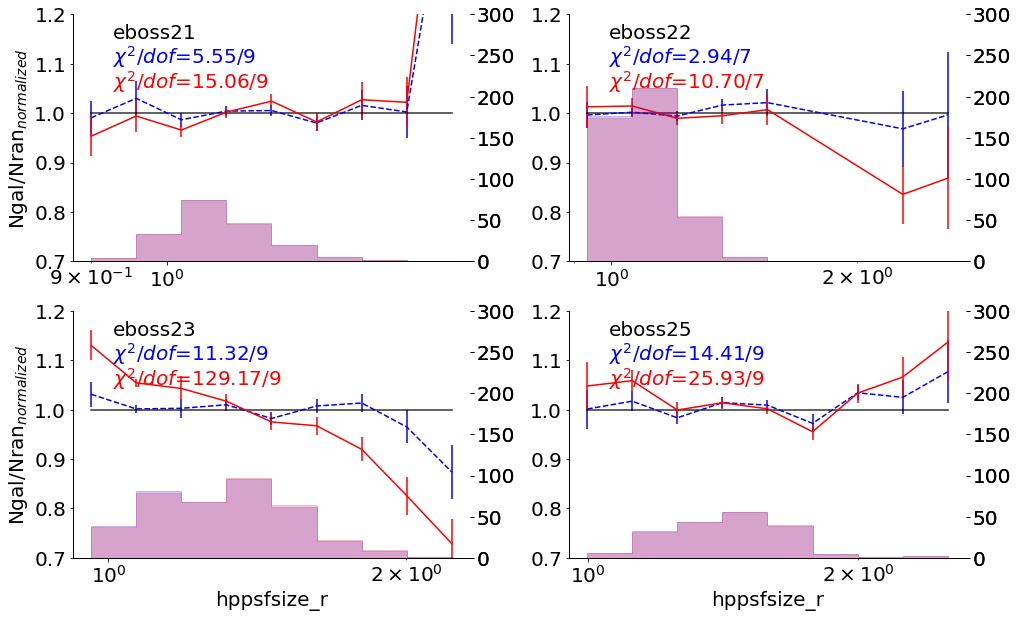

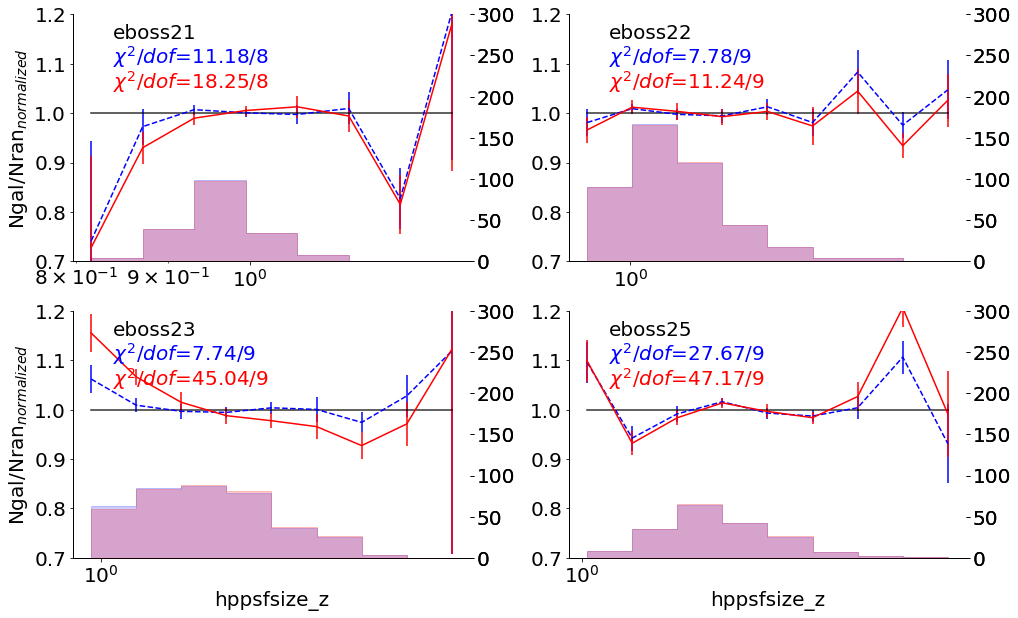

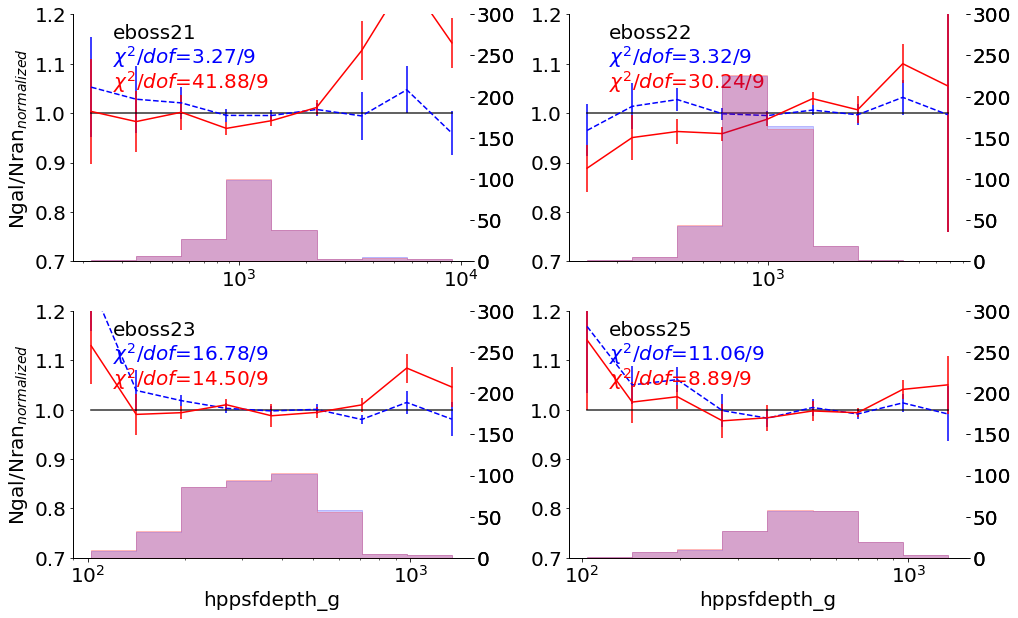

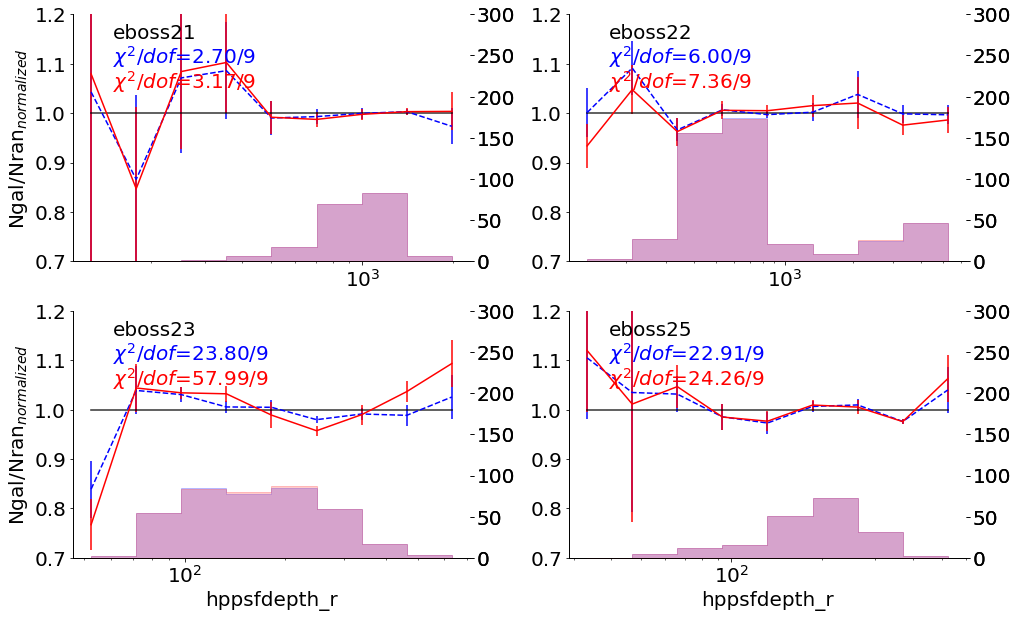

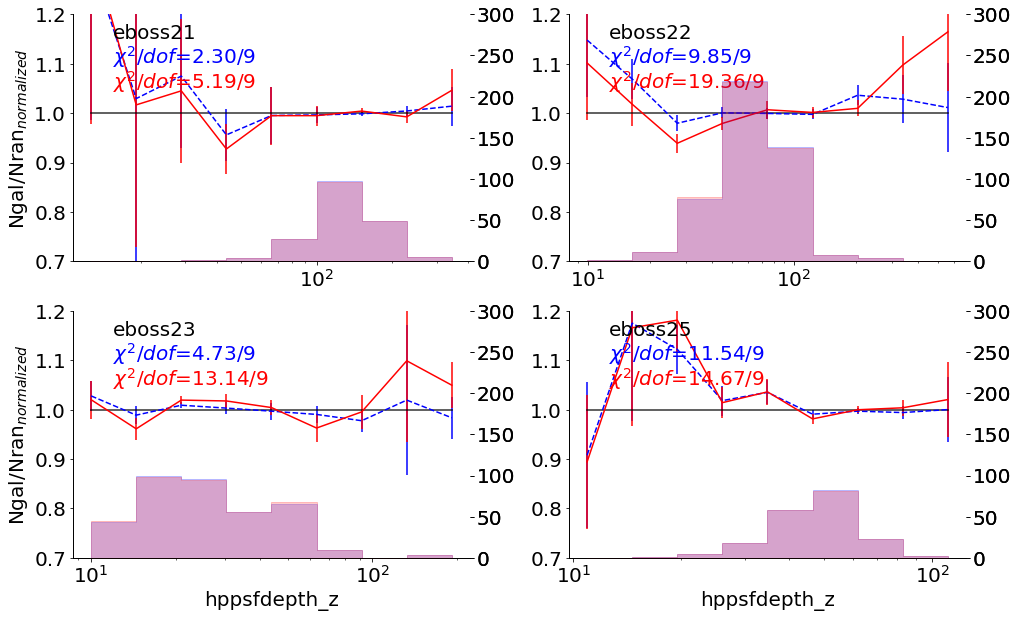

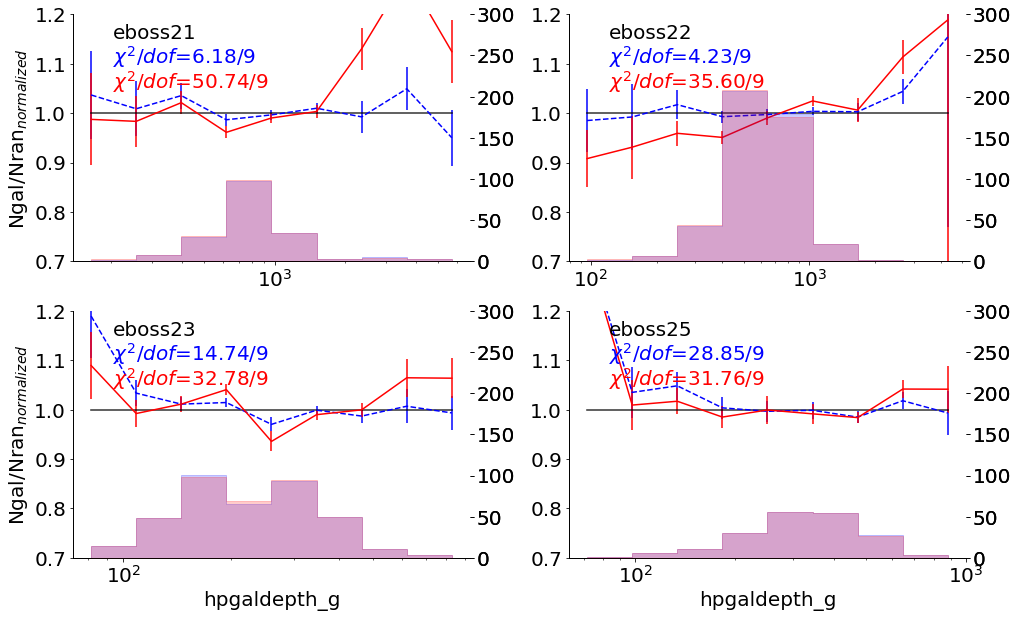

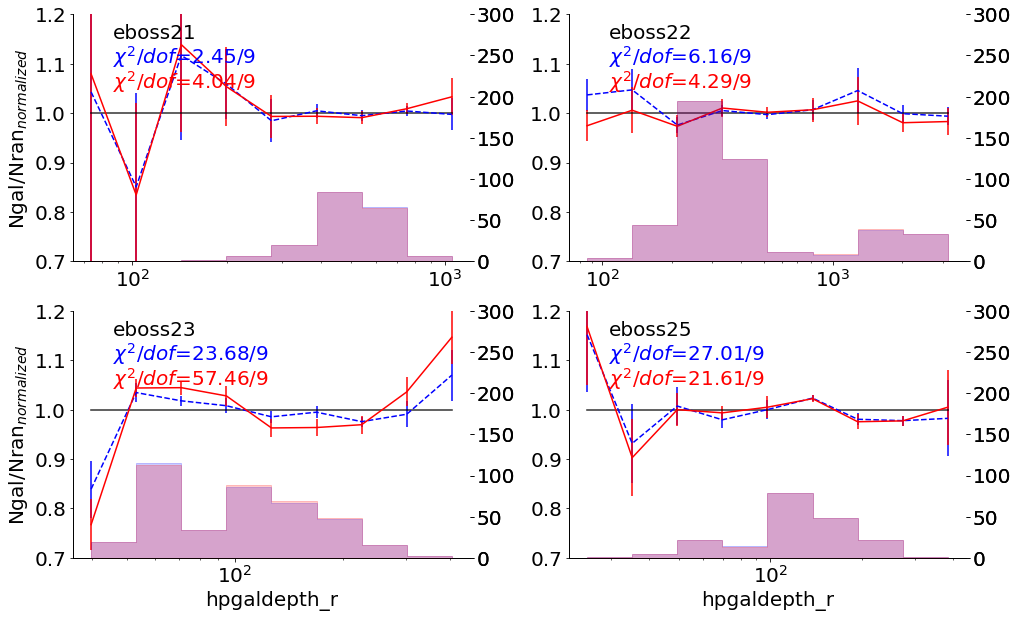

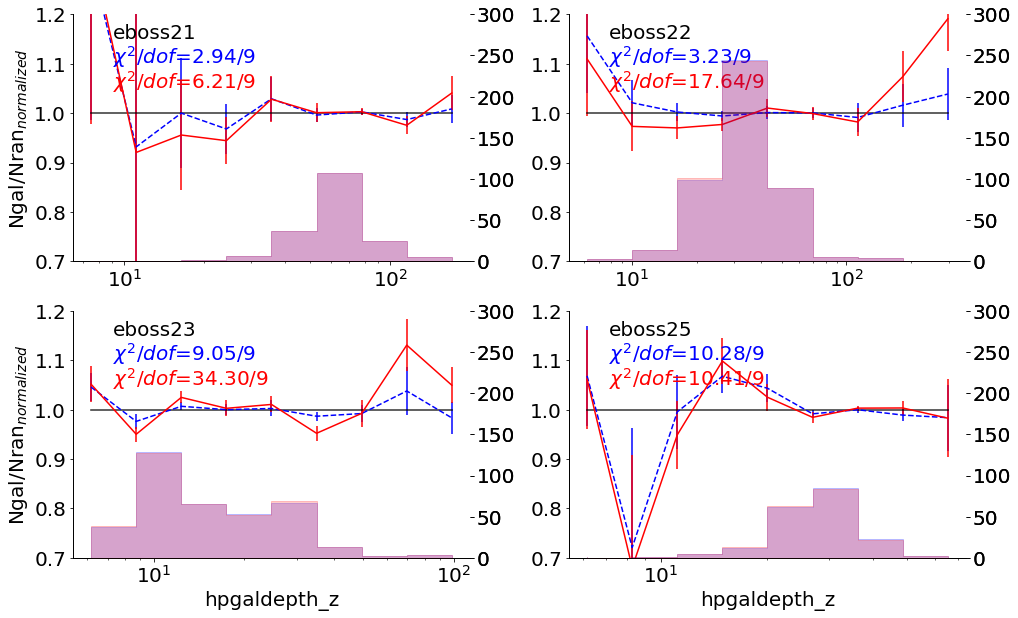

In [22]:
def helper(name):
    x = name['bin_edges'][:-1]
    y = name['delta']
    ye = name['delta_err']
    s = name['area']
    mask = (y != 0.0 ) & ~np.isnan(y) & (ye !=0.0) & (~np.isnan(ye))
    x = x[mask]
    y = y[mask]
    ye = ye[mask]
    s  = s[mask]
    return x, y, ye, s

chi2 = lambda y, ye: np.sum(((y-1.0)/ye)**2)

def add_plot(ax, n, t, i, text=True, **kwargs):
    a2 = ax.twinx()
    x,y,ye,s = helper(n)
    ax.errorbar(x, y, yerr=ye,**kwargs)
    if text:ax.text(0.1, 0.9, t, transform=ax.transAxes, color='k')
    kwargs.pop('linestyle')
    ax.text(0.1, 0.8-0.1*i, r'$\chi^{}/dof$={:.2f}/{}'.format(2, chi2(y, ye),y.size),
           transform=ax.transAxes, **kwargs)
    a2.fill_between(x, s, step='pre', **kwargs, alpha=0.2)
    a2.set_ylim(0,300)
    ax.set_ylim(0.7, 1.2)
    ax.plot([x.min(), x.max()], [1, 1], 'k-', alpha=0.5)


def plot_4chunks(d_nstarchunks, sysname):
    f,a = plt.subplots(ncols=2, nrows=2, figsize=(16,10))
    plt.subplots_adjust(wspace=0.25)
    a = a.flatten()
    # plt.suptitle('eboss all vtest')
    # a.set_xlim(0.01, 0.2)
    t = ['eboss21', 'eboss22', 'eboss23', 'eboss25']
    for i,n in enumerate(range(len(d_nstarchunks))):
        add_plot(a[i], d_nstarchunks[i]['ai'], t[i], 0, color='b', linestyle='--')
        add_plot(a[i], d_nstarchunks[i]['uni'], t[i],1, color='r', text=False, linestyle='-')
        if i in [0, 2]:a[i].set_ylabel(r'Ngal/Nran$_{normalized}$')
        if i in [2, 3]:a[i].set_xlabel(sysname)
        a[i].set_xscale('log')

for k in range(len(allmasks['1'])):
    d_syschunk = [allmasks[e][k] for e in ['1', '2', '3', '5']]
    plot_4chunks(d_syschunk, syscols[k])

/global/homes/m/mehdi/cori-envs/py3p6/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


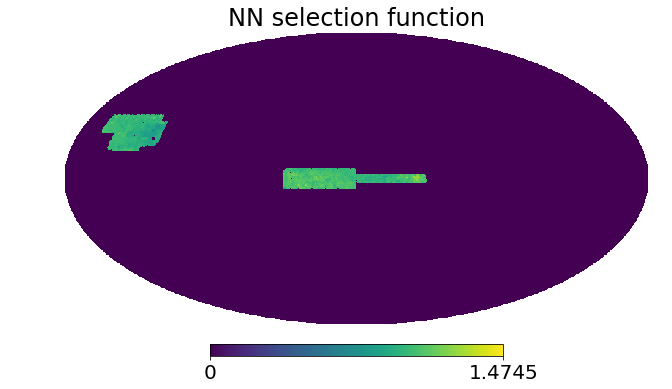

In [23]:
hp.mollview(ranmap2, title='NN selection function')

In [24]:
ls /global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/

ELG.v5_10_7.latest.fits            hp-nn256.fits
ELG.v5_10_7.latest.rands.fits      hp-ran256.fits
data4fold/                         ngal-feat-256-wo-ndet.fits
eBOSS_ELG_full_ALL_vtest.dat.fits  ngal-feat-256-wofrac-wondet.fits
eBOSS_ELG_full_ALL_vtest.ran.fits  ngal-feat-256.fits
hp-elg256.fits


In [25]:
hp.write_map('/global/cscratch1/sd/mehdi/eboss/ebossv5_10_7/march12/hp-nn256.fits', ranmap2, 
             fits_IDL=False, overwrite=True,
             extra_header=[' nn selec. func. frac as weight for MSE 03132018 (no ndet, no frac)'])

Let's go and compute some clustering!